## Normal Distribution

While it's not necessary to memorize this equation, I should be able to recognize it.
\begin{equation}
f(x|\mu,\sigma^2)=\frac1{\sqrt{2\sigma^2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation} 

1. Symmetric
2. Area under the curve is exactly 1.0
3. 68%, 95%, 99.7% for 1, 2 and 3 stDev.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Go over what this next line does.
%matplotlib inline

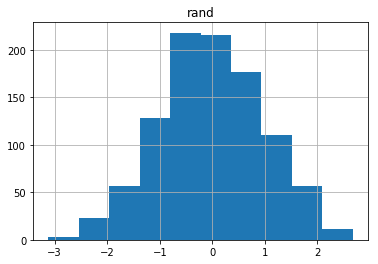

In [3]:
# Making a standard normally distributed variable with 1000 observations, a mean of 0, and 
# a standard deviation of 1, and putting it in a data frame.
mean = 0 
sd = 1
n = 1000

# why are we not using n for 1000?
df = pd.DataFrame({'rand': np.random.normal(mean, sd, 1000)})

# Plotting the variables in the data frame (here, just the variable "rand") as a histogram.
df.hist()
# Inline printing the histogram
plt.show()

The normal distribution is useful for data scientists because:

1. It is easily summarized using just two statistics (mean and standard deviation).
2. The area under the curve is 1, making it easy to calculate the probability of individual outcomes within the distribution.
3. It describes many natural phenomena, such as blood pressure, height, weight, etc.
4. In general, any variable that measures an outcome produced by many small effects acting additively and independently will have a close to normal distribution.
5. Lots of common scores (percentiles, z-scores) and statistical tests (t-tests, ANOVAs, bell-curve grading) assume a normal distribution.

__Question:__ Isn't the normal distribution important _because of_ the CLT?

### Test for normality: NQP (normal quantile plot) also known as QQ plot.

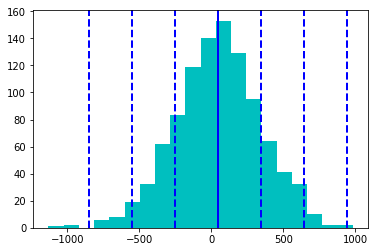

In [6]:
# Making two variables.
rand1 = np.random.normal(50, 300, 1000)
rand2 = np.random.poisson(1, 1000)

# Sorting the values in ascending order.
rand1.sort()
rand2.sort()

# Making a standard normally distributed variable with 1000 observations,
# a mean of 0, and standard deviation of 1 that we will use as our “comparison.”
norm = np.random.normal(0, 1, 1000)

# Sorting the values in ascending order.
norm.sort()

#Plot a histogram for rand1.
plt.hist(rand1, bins=20, color='c')

# Add a vertical line at the mean.
plt.axvline(rand1.mean(), color='b', linestyle='solid', linewidth=2)

# Add a vertical line at one, two and three standard deviations above the mean.
plt.axvline(rand1.mean() + rand1.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(rand1.mean() + 2*rand1.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(rand1.mean() + 3*rand1.std(), color='b', linestyle='dashed', linewidth=2)

# Add a vertical line at one, two and three standard deviations below the mean.
plt.axvline(rand1.mean()-rand1.std(), color='b', linestyle='dashed', linewidth=2) 
plt.axvline(rand1.mean() - 2*rand1.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(rand1.mean() - 3*rand1.std(), color='b', linestyle='dashed', linewidth=2)

# Print the histogram.
plt.show()

68/95/99.7 rule seems to be good.  Symmetry is there.  First glance is that it seems 'normal'.

But the NQP is the gold standard.

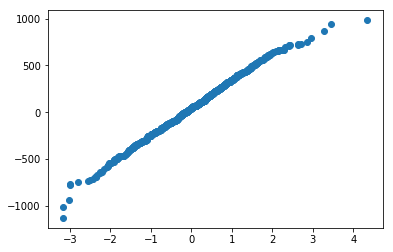

In [7]:
# Plotting the variable rand1 against norm in qqplots.
plt.plot(norm, rand1, "o") 
plt.show() 

Except for a handful of points at the lower end, this is very linear.

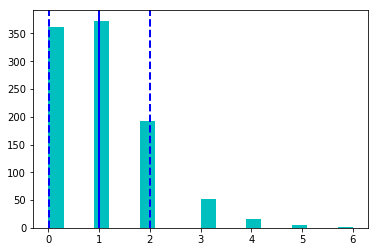

In [9]:
#Plot a histogram for rand2.
plt.hist(rand2, bins=20, color='c')

# Add a vertical line at the mean.
plt.axvline(rand2.mean(), color='b', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(rand2.mean() + rand2.std(), color='b', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(rand2.mean()-rand2.std(), color='b', linestyle='dashed', linewidth=2)

# Print the histogram.
plt.show()

Clearly not symmetric. 68/95/99.7 rule not being followed.

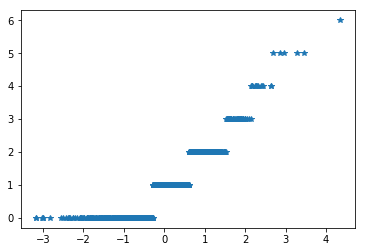

In [11]:
plt.plot(norm, rand2, '*')
plt.show()

Clearly non-linear.

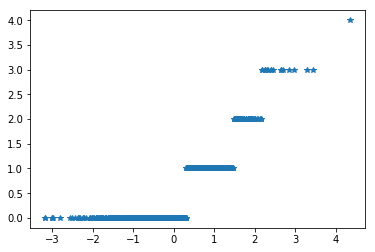

In [17]:
# One last example which will become "almost" normal
rand3 = np.random.binomial(10, .05, 1000)
rand3.sort()
plt.plot(norm, rand3, "*")
plt.show()

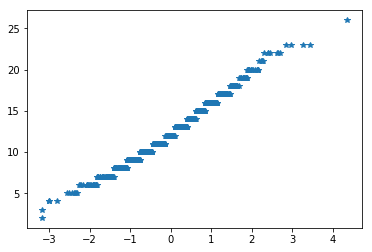

In [18]:
# As the sampling size of the binomial grows, it tends to normal, 
# even for highly skewed distribution
rand3 = np.random.binomial(250, .05, 1000)
rand3.sort()
plt.plot(norm, rand3, "*")
plt.show()

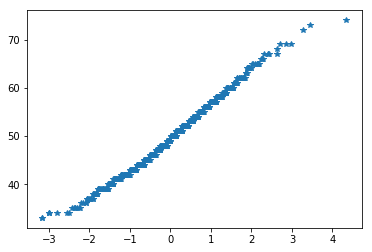

In [19]:
# As the sampling size of the binomial grows, it tends to normal, 
# even for highly skewed distribution
rand3 = np.random.binomial(1000, .05, 1000)
rand3.sort()
plt.plot(norm, rand3, "*")
plt.show()

### Bernoulli, also called Binomial

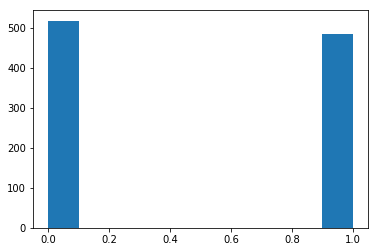

In [20]:
# Generate a bernoulli distribution with p =0.5.
bernoulli= np.random.binomial(1, .5, 1000)

#Plot a histogram.
plt.hist(bernoulli)

# Print the histogram
plt.show()

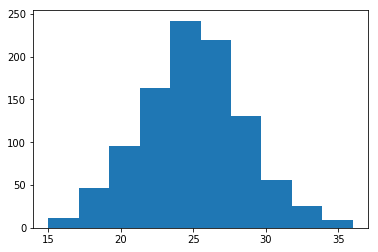

In [21]:
# Generate a bernoulli distribution with p =0.5.
bernoulli= np.random.binomial(50, .5, 1000)

#Plot a histogram.
plt.hist(bernoulli)

# Print the histogram
plt.show()

### Gamma
The **gamma distribution** represents the time until an event (such as lifespan until death), when the event starts out unlikely (few people die in youth), becomes more likely (more people die in old age), then becomes less likely again (few people die in extreme old age because most have already died).  Summarized by a shape parameter ($\alpha$) and an inverse-scale parameter ($\beta$). The probability density function is:

\begin{equation}
f(x|\alpha,\beta)=\frac{\beta^\alpha x^{\alpha-1} e^{-x\beta}} {\Gamma(\alpha)} \text {for } x \ge 0 \text { and } \alpha,\beta \ge0
\end{equation} 

\begin{equation}
\mu = \alpha * \theta
\end{equation}

\begin{equation}
\sigma^2 = \alpha * \theta^2
\end{equation}



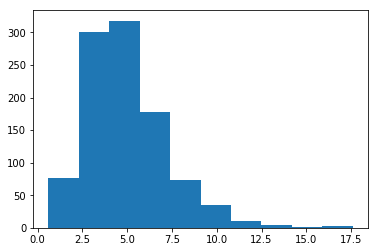

In [23]:
# Generate a gamma distribution with shape =5 and scale = 1
gamma = np.random.gamma(5,1, 1000)

# Plot a histogram.
plt.hist(gamma)

# Print the histogram.
plt.show()

### Poisson or Waiting dist
The **poisson distribution** represents the number of times a given event (such as a phone call to a radio show) will occur during a given time interval.  Data can range from 0 (no phone calls during the time period) to approaching infinity (the phone never stopped ringing during the time period).  Summarized by $\lambda$ (“lambda”), the rate that events occur during a given time period.  The probability mass function is:

\begin{equation}
f(k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}
\end{equation} 

The smaller lambda is, the more skewed the Poisson distribution.  Very close to normal for large lambda.  See the curve two cells down.

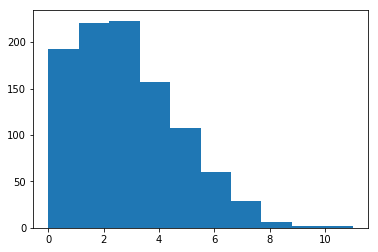

In [31]:
# Generate a Poisson distribution with lambda = 3
poisson = np.random.poisson(3, 1000)

# Plot a histogram.
plt.hist(poisson)

# Print the histogram.
plt.show()

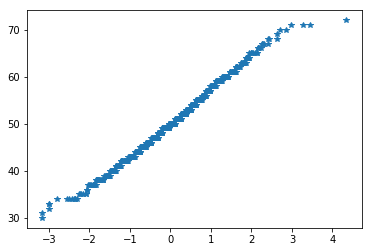

In [32]:
# Generate a Poisson distribution with lambda = 50
poisson2 = np.random.poisson(50, 1000)

# Sort
poisson2.sort()

# 
plt.plot(norm,poisson2,"*")
plt.show()